
# Let's scrape github!  
1) get the first 100 repos for the query string "data science"  
2) for each repo collect:
    - the name of the repo - like "donnemartin/data-science-ipython-notebooks"
    - the link of the repo - like https://github.com/donnemartin/data-science-ipython-notebooks
    - the number of commits
    - the number of contributors
    - the number of "watch", "star", "fork"
    - [bonus] the number of open issues and closed issues
    - [bonus] all the titles of the open issues (just get the ones in the first page)

In [6]:
import requests
from bs4 import BeautifulSoup

# Extract info from one single repo page

In [18]:
def extract_commits_contributors(soup):
    """
    This is to extract commits and contributors.
    """
    commits = None
    contributors = None
    num_summary_section = soup.find('ul', {'class':'numbers-summary'})
    for i,li in enumerate(num_summary_section.findAll('li')):
        if i==0:
            commits = li.text.replace('commits','').strip()
        if i==3:
            contributors = li.text.replace('contributors','').strip()
    return int(commits),int(contributors)


def extract_watch_star_fork(soup):
    """
    This is to extract watch, star, fork.
    """
#     (0, u'Watch')
#     (1, u'1198')
#     (2, u'Star')
#     (3, u'12120')
#     (4, u'Fork')
#     (5, u'3423')
    watch, star, fork = None, None, None
    for i,a in enumerate(soup.find('ul', {'class':'pagehead-actions'}).findAll('a')):
        if i==1: watch = int(a.text.strip().replace(',',''))
        if i==3: star = int(a.text.strip().replace(',',''))
        if i==5: fork = int(a.text.strip().replace(',',''))
    return watch, star, fork

def get_issues(url):
    """
    This is to analyse the issues page.
    """
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    stats_session = soup.find('div', {'class':'table-list-header-toggle states float-left pl-3'})
    open_issues = stats_session.findAll('a')[0].text.replace('Open','').strip()
    closed_issues = stats_session.findAll('a')[1].text.replace('Closed','').strip()
    
    issues = []
    for li in soup.findAll('li'):
        if 'issue' in li.get('id', ''):
            issues.append(li.find('a').text.strip())
    return open_issues, closed_issues, issues
    

In [19]:
def extract_info_repo(url):
    """
    This is to extract info from a single repo.
    """
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'lxml')
    
    #extract commits and contributors
    commits,contributors = extract_commits_contributors(soup)
    print('commits', commits)
    print('contributors', contributors)
    
    #extract watch, star, fork
    watch, star, fork = extract_watch_star_fork(soup)
    print('watch', watch)
    print('star', star)
    print('fork', fork)
    
    #extract issues
    issues_url = url + '/issues'
    open_issues, closed_issues, issues = get_issues(issues_url)
    print('open_issues',open_issues)
    print('closed_issues',closed_issues)
    for i,issue in enumerate(issues):
        print(i,issue)

In [20]:
extract_info_repo("https://github.com/donnemartin/data-science-ipython-notebooks")

('commits', 541)
('contributors', 9)
('watch', 1198)
('star', 12123)
('fork', 3422)
('open_issues', u'3')
('closed_issues', u'18')
(0, u'Request for sage references')
(1, u'Migrate notebook references from the now deprecated EMR CLI to the recommended AWS CLI')
(2, u'Add notebook for Bokeh')


# Extract titles and links

In [13]:
r = requests.get('https://github.com/search?utf8=%E2%9C%93&q=data+science&type=')
soup = BeautifulSoup(r.text, 'lxml')

for div in soup.findAll('div',{'class':'repo-list-item d-flex flex-justify-start py-4 public source'}):
    title = div.find('h3').text
    print(title.strip())
    #print(div.find('a').get('href'))

<!DOCTYPE html>\n<html>\n<head>\n<meta content="text/html; charset=unicode-escape" http-equiv="Content-type"/>\n<meta content="default-src 'none'; base-uri 'self'; connect-src 'self'; form-action 'self'; img-src data:; script-src 'self'; style-src 'unsafe-inline'" http-equiv="Content-Security-Policy"/>\n<meta content="origin" name="referrer"/>\n<title>Rate limit \xb7 GitHub</title>\n<style media="screen" type="text/css">\n      body {\n        background-color: #f1f1f1;\n        margin: 0;\n        font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;\n      }\n\n      .container { margin: 50px auto 40px auto; width: 600px; text-align: center; }\n\n      a { color: #4183c4; text-decoration: none; }\n      a:hover { text-decoration: underline; }\n\n      h1 { letter-spacing: -1px; line-height: 60px; font-size: 60px; font-weight: 100; margin: 0px; text-shadow: 0 1px 0 #fff; }\n      p { color: rgba(0, 0, 0, 0.5); margin: 20px 0 40px; }\n\n      ul { list-style: none; margin: 25px 
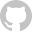
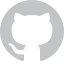

In [14]:
# ERROR BECAUSE OF: You have triggered an abuse detection mechanism.

soup